# Medication recommendation analysis

The dataset was taken from kaggle and is designed to assist in predicting recommended medications for patients.
It incorporates a mix of patient health data, environmental variables, and lifestyle choices to improve model accuracy and better simulate real-world scenarios. To get the data and check the source.
Click on the [Link](https://www.kaggle.com/datasets/ziya07/fever-diagnosis-and-medicine-dataset).

In [1]:
#import needed packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics

In [2]:
# Load in Dataset
df = pd.read_csv("enhanced_fever_medicine_recommendation.csv")

In [3]:
# Look at Dataset
# 1000 Samples
# 19 features and 1 target column
df

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,Normal,89,Female,24.0,No,Yes,No,No,Yes,No,Yes,81.4,430,Moderate,Vegan,72,Normal,None,Ibuprofen
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
2,36.4,Normal,92,Male,27.8,No,No,No,No,No,No,Yes,73.7,400,Sedentary,Vegan,85,High,None,Ibuprofen
3,39.8,High Fever,66,Male,18.7,No,Yes,No,No,No,No,No,44.1,438,Active,Non-Vegetarian,96,High,Ibuprofen,Ibuprofen
4,39.3,High Fever,28,Male,21.0,No,Yes,No,Yes,Yes,Yes,Yes,65.9,451,Active,Vegetarian,85,Low,Paracetamol,Ibuprofen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,39.9,High Fever,59,Male,22.1,Yes,Yes,Yes,No,Yes,Yes,Yes,49.8,87,Sedentary,Vegetarian,67,Normal,Ibuprofen,Ibuprofen
996,36.9,Normal,74,Female,18.1,Yes,Yes,Yes,Yes,Yes,No,No,72.5,200,Sedentary,Vegetarian,83,High,None,Ibuprofen
997,36.1,Normal,8,Female,29.6,Yes,Yes,No,No,Yes,Yes,Yes,50.7,178,Moderate,Vegetarian,97,High,None,Ibuprofen
998,38.8,High Fever,87,Female,25.2,No,No,No,No,No,No,Yes,44.3,225,Sedentary,Non-Vegetarian,97,High,None,Ibuprofen


**We can make a list of important features for our analysis**

_Describing Features_:

1. Temperature (Celsius)
2. Age (1-100)
3. Gender (Male or Female)
4. BMI (Body Mass Index)
5. Headache (Yes or No)
6. Body_Ache (Yes or No)
7. Fatigue (Yes or No)
8. Chronic_Conditions (Yes or No)
9. Allergies (Yes or No)
10. Smoking_History (Yes or No)
11. Alcohol_Consumption (Yes or No)
12. Physical_Activity (Sedentary, Moderate, Active)
13. Diet_Type (Vegetarian, Non-Vegetarian, Vegan)
14. Heart_Rate (Resting Heart rate)
15. Blood_Pressure (Normal, High, Low)
16. Previous_Medication (Paracetamol, Ibuprofen, Aspirin,  None)
17. Recommended_Medication (Paracetamol or Ibuprofen)
18. Humidity (Patient's area)
19. AQI (Air Quality Index)
20. Fever_Severity (Normal, Mild or High)

_Most important ones_:

1. Temperature
2. Age
3. Gender
4. Recommended_Medication
5. Previous_Medication
6. Fever_Severity

In [4]:
#If you need to get rid of categorized columns
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()

dfle = df

dfle.Fever_Severity = le.fit_transform(dfle.Fever_Severity)
dfle.Gender = le.fit_transform(dfle.Gender)
dfle.Headache = le.fit_transform(dfle.Headache)
dfle.Body_Ache = le.fit_transform(dfle.Body_Ache)
dfle.Fatigue = le.fit_transform(dfle.Fatigue)
dfle.Chronic_Conditions = le.fit_transform(dfle.Chronic_Conditions)
dfle.Allergies = le.fit_transform(dfle.Allergies)
dfle.Smoking_History = le.fit_transform(dfle.Smoking_History)
dfle.Alcohol_Consumption = le.fit_transform(dfle.Alcohol_Consumption)
dfle.Physical_Activity = le.fit_transform(dfle.Physical_Activity)
dfle.Diet_Type = le.fit_transform(dfle.Diet_Type)
dfle.Blood_Pressure = le.fit_transform(dfle.Blood_Pressure)
dfle.Previous_Medication = le.fit_transform(dfle.Previous_Medication)
dfle.Recommended_Medication = le.fit_transform(dfle.Recommended_Medication)

dfle


,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,2,89,0,24.0,0,1,0,0,1,0,1,81.4,430,1,1,72,2,2,0
1,37.5,1,94,1,26.6,0,0,0,1,0,1,1,44.4,10,0,2,62,0,1,1
2,36.4,2,92,1,27.8,0,0,0,0,0,0,1,73.7,400,2,1,85,0,2,0
3,39.8,0,66,1,18.7,0,1,0,0,0,0,0,44.1,438,0,0,96,0,1,0
4,39.3,0,28,1,21.0,0,1,0,1,1,1,1,65.9,451,0,2,85,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,39.9,0,59,1,22.1,1,1,1,0,1,1,1,49.8,87,2,2,67,2,1,0
996,36.9,2,74,0,18.1,1,1,1,1,1,0,0,72.5,200,2,2,83,0,2,0
997,36.1,2,8,0,29.6,1,1,0,0,1,1,1,50.7,178,1,2,97,0,2,0
998,38.8,0,87,0,25.2,0,0,0,0,0,0,1,44.3,225,2,0,97,0,2,0


In [5]:
#Split the model for training
from sklearn.model_selection import train_test_split
X = dfle.drop('Fever_Severity', axis= 1)
y = dfle['Fever_Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Try Various models
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

kf= KFold(n_splits=5, shuffle=True, random_state=42)

In [7]:
# The error is low, which is good
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LinearRegression()
    
    model.fit(X_train, y_train)
    
    y_pred= model.predict(X_test)
    
    mse= mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.12491733943533895
Mean Squared Error: 0.14064663336470795
Mean Squared Error: 0.11463678723586966
Mean Squared Error: 0.12378715327803257
Mean Squared Error: 0.11266644806090119


In [8]:
# Try another model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
y_pred = model.predict(X_test)

In [10]:
# If the accuracy is 1 it means the model may be overfitted, too clean or something went wrong.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


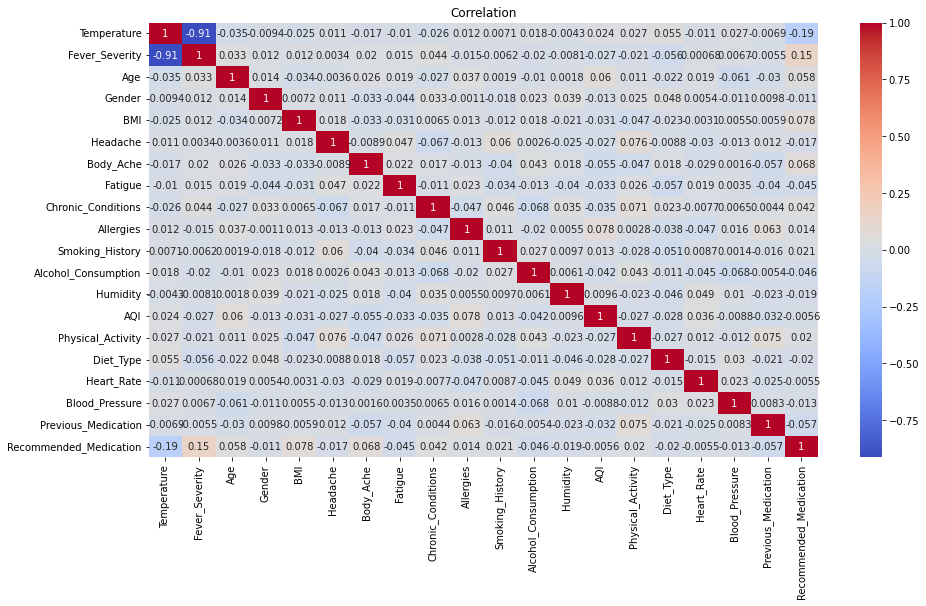

In [22]:
# We can see that the only feature with the best correlation is Fever_Severity with Temperature and Recommended_Medication with Fever_Severity
corr_df = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

In [12]:
#Assesing data
# data is well distributed
df['Gender'].value_counts()

0    512
1    488
Name: Gender, dtype: int64

In [13]:
# We can reduce the size by selecting an Age group
# if we wanted to modify the data 
df['Age'].describe()

count    1000.000000
mean       51.152000
std        28.873354
min         1.000000
25%        26.000000
50%        51.000000
75%        76.000000
max       100.000000
Name: Age, dtype: float64

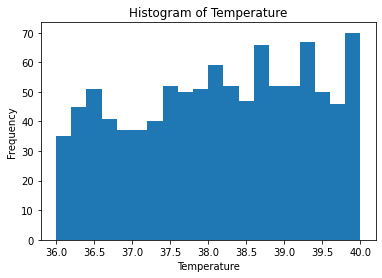

In [14]:

plt.hist(dfle['Temperature'], bins=20)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()


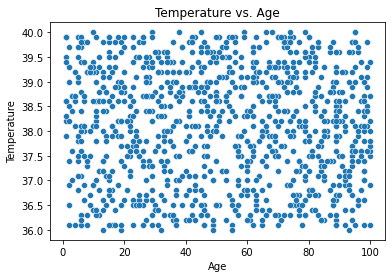

In [15]:
# A scatterplot it's not usefull in this case, there is no trend to work with
sns.scatterplot(x='Age', y='Temperature', data=dfle)
plt.xlabel('Age')
plt.ylabel('Temperature')
plt.title('Temperature vs. Age')
plt.show()

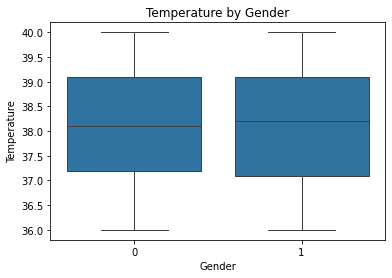

In [16]:
sns.boxplot(x='Gender', y='Temperature', data=df)
plt.xlabel('Gender')
plt.ylabel('Temperature')
plt.title('Temperature by Gender')
plt.show()

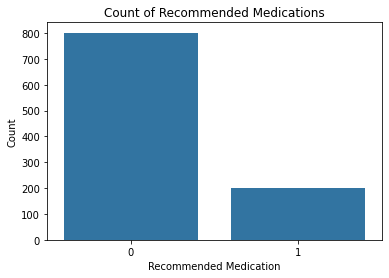

In [17]:
# Ibuprofen is recommended more than Paracetamol
sns.countplot(x='Recommended_Medication', data=df)
plt.xlabel('Recommended Medication')
plt.ylabel('Count')
plt.title('Count of Recommended Medications')
plt.show()

In [18]:
# This way you could work with the data separately and try to find differences.
male_data = df[df['Gender'] == 1]
female_data = df[df['Gender'] == 0]
male_data

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
1,37.5,1,94,1,26.6,0,0,0,1,0,1,1,44.4,10,0,2,62,0,1,1
2,36.4,2,92,1,27.8,0,0,0,0,0,0,1,73.7,400,2,1,85,0,2,0
3,39.8,0,66,1,18.7,0,1,0,0,0,0,0,44.1,438,0,0,96,0,1,0
4,39.3,0,28,1,21.0,0,1,0,1,1,1,1,65.9,451,0,2,85,1,3,0
6,39.1,0,63,1,18.5,1,0,0,0,1,0,1,71.8,133,1,2,70,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,36.1,2,29,1,34.4,1,0,0,0,1,1,1,77.2,62,1,1,85,1,0,0
989,37.4,1,86,1,26.8,1,1,0,1,0,1,0,63.7,251,0,2,94,1,1,1
990,39.8,0,74,1,32.1,1,0,1,1,0,0,0,69.8,434,2,1,66,1,0,0
992,36.4,2,31,1,26.7,0,0,0,0,0,0,1,58.0,449,2,1,98,2,3,0


In [19]:
# This is one way to compare if stats are different by gender

output_string = ""

output_string += "male_mean_temperature: " + str(male_data['Temperature'].mean()) + "\n"
output_string += "female_mean_temperature: " + str(female_data['Temperature'].mean()) + "\n"
# 0= No 1 =Yes
output_string += "male_headache_count: " + str(male_data['Headache'].value_counts()) + "\n"
output_string += "female_headache_count: " + str(female_data['Headache'].value_counts()) + "\n"
# Previous_Medication : 1 None, 2 Ibuprofen, 3 Paracetamol, 0, Aspirin
output_string += "male_previous_medication_count: " + str(male_data['Previous_Medication'].value_counts()) + "\n"
output_string += "female_previous_medication_count: " + str(female_data['Previous_Medication'].value_counts()) + "\n"
print(output_string)


#print("male_mean_temperature: " + str(male_data['Temperature'].mean()) + ", female_mean_temperature: " + str(female_data['Temperature'].mean()))

male_mean_temperature: 38.08790983606558
female_mean_temperature: 38.109375
male_headache_count: 1    254
0    234
Name: Headache, dtype: int64
female_headache_count: 1    261
0    251
Name: Headache, dtype: int64
male_previous_medication_count: 1    136
3    132
0    117
2    103
Name: Previous_Medication, dtype: int64
female_previous_medication_count: 2    134
0    131
3    124
1    123
Name: Previous_Medication, dtype: int64



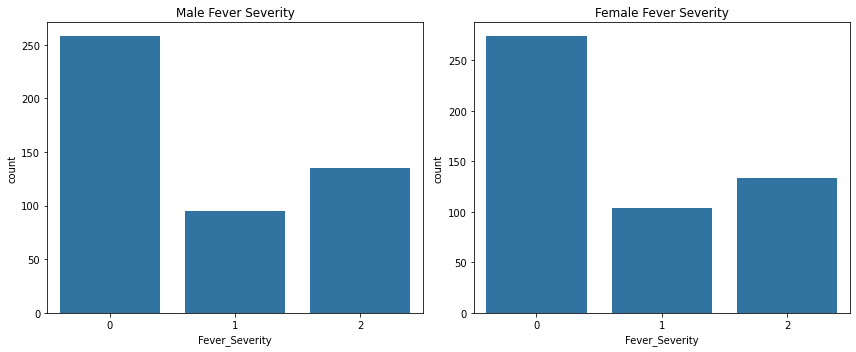

In [20]:
# 0 High, 1 Mild, 2 Normal
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for male_data
sns.countplot(x='Fever_Severity', data=male_data, ax=axes[0])
axes[0].set_title('Male Fever Severity')

# Plot for female_data
sns.countplot(x='Fever_Severity', data=female_data, ax=axes[1])
axes[1].set_title('Female Fever Severity')

plt.tight_layout()
plt.show()

In [21]:
df.describe()

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,38.09890,0.737000,51.152000,0.488000,26.44320,0.515000,0.515000,0.492000,0.516000,0.478000,0.507000,0.523000,60.594400,248.493000,0.962000,0.972000,80.14400,0.991000,1.501000,0.199000
std,1.13887,0.855899,28.873354,0.500106,4.90115,0.500025,0.500025,0.500186,0.499994,0.499766,0.500201,0.499721,17.058475,143.705244,0.831413,0.817242,11.79196,0.809676,1.122167,0.399448
min,36.00000,0.000000,1.000000,0.000000,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,60.00000,0.000000,0.000000,0.000000
25%,37.20000,0.000000,26.000000,0.000000,22.40000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.600000,127.750000,0.000000,0.000000,70.00000,0.000000,1.000000,0.000000
50%,38.20000,0.000000,51.000000,0.000000,26.50000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,60.950000,247.500000,1.000000,1.000000,80.00000,1.000000,1.000000,0.000000
75%,39.10000,2.000000,76.000000,1.000000,30.52500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,74.725000,375.250000,2.000000,2.000000,90.00000,2.000000,3.000000,0.000000
max,40.00000,2.000000,100.000000,1.000000,35.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,499.000000,2.000000,2.000000,100.00000,2.000000,3.000000,1.000000


In order to get a clearer analysis one could work with the various features in this dataset and try to find a relation.
In my case i find the data to be too similar. 
There is much that can be worked on or improved, my recommendation would be to add even more data from other sources.
If it's not only a classifying data problem one could work with more complex models.